In [1]:
%load_ext autoreload
%autoreload 2

!pip install scikit-learn

In [2]:
import kaggle_data_loader as dl

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import pandas as pd

### Load data with normalized features

In [3]:
train_df, test_df, y_train, y_test = dl.load_train_test('heart_failure_clinical_records_dataset.csv')

/home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
train_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,1.360000e+02,136.000000,1.360000e+02,136.000000,1.360000e+02,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,1.360000e+02
mean,-2.644943e-16,0.485294,1.306145e-17,0.404412,-1.240837e-16,0.404412,-5.844998e-16,-6.465416e-16,-3.134747e-15,0.639706,0.316176,-7.836868e-17
std,1.000000e+00,0.501631,1.000000e+00,0.492592,1.000000e+00,0.492592,1.000000e+00,1.000000e+00,1.000000e+00,0.481861,0.466702,1.000000e+00
min,-1.654620e+00,0.000000,-9.042979e-01,0.000000,-1.971400e+00,0.000000,-2.176871e+00,-1.708488e+00,-2.772725e+00,0.000000,0.000000,-1.687469e+00
25%,-8.140210e-01,0.000000,-7.373506e-01,0.000000,-6.583403e-01,0.000000,-6.995238e-01,-7.132524e-01,-6.255898e-01,0.000000,0.000000,-7.336290e-01
50%,2.657776e-02,0.000000,-3.898529e-01,0.000000,-1.810285e-03,0.000000,5.122212e-02,-4.976180e-02,-8.880612e-02,1.000000,0.000000,-2.072626e-01
75%,6.990568e-01,1.000000,4.189140e-01,1.000000,5.726534e-01,1.000000,6.406409e-01,2.819835e-01,7.163694e-01,1.000000,1.000000,9.284128e-01
max,2.968674e+00,1.000000,3.619356e+00,1.000000,1.803647e+00,1.000000,2.649129e+00,2.604201e+00,2.863504e+00,1.000000,1.000000,1.898203e+00


In [6]:
test_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.128303,0.423913,-0.158277,0.413043,0.016922,0.336957,-0.163400,-0.077167,-0.091723,0.673913,0.358696,-0.080768
std,0.957788,0.496885,0.829817,0.495079,0.875983,0.475260,0.885203,1.042532,0.913845,0.471348,0.482246,0.929086
min,-1.654620,0.000000,-0.946344,0.000000,-1.725201,0.000000,-1.881401,-1.708488,-1.967549,0.000000,0.000000,-1.610906
25%,-0.582856,0.000000,-0.719419,0.000000,-0.658340,0.000000,-0.618621,-0.713252,-0.893982,0.000000,0.000000,-0.749580
50%,0.054612,0.000000,-0.533304,0.000000,-0.001810,0.000000,-0.045270,-0.381507,-0.088806,1.000000,0.000000,-0.271065
75%,0.867177,1.000000,0.418914,1.000000,0.264905,1.000000,0.317032,0.281984,0.716369,1.000000,1.000000,0.673205
max,2.548374,1.000000,3.154376,1.000000,1.967780,1.000000,2.353660,2.604201,2.058329,1.000000,1.000000,1.553672


### Apply PCA with 2 components to visualize dataset

In [7]:
pca = PCA(n_components=2)
coordinates = pca.fit_transform(train_df)
binary_labels_train = y_train

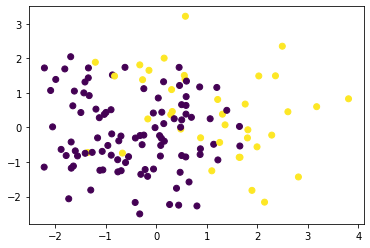

In [8]:
plt.scatter(
    x=coordinates[:,0],
    y=coordinates[:,1],
    c=binary_labels_train
)
plt.show()

### Do PCA with maximum number of components

In [9]:
pca_full = PCA(n_components=12)
train_coordinates = pca_full.fit_transform(train_df)
test_coordinates = pca_full.transform(test_df)
binary_labels_train = y_train.values
binary_labels_test = y_test.values
train_coordinates.shape

(136, 12)

In [10]:
pca_train_df = pd.DataFrame(train_coordinates, columns=[f"pca_{j}" for j in range(1, 13)])
pca_train_df["label"] = binary_labels_train
pca_test_df = pd.DataFrame(test_coordinates, columns=[f"pca_{j}" for j in range(1, 13)])
pca_test_df["label"] = binary_labels_test
pca_train_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,label
count,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,1.360000e+02,136.000000
mean,-1.306145e-17,-2.612289e-17,3.918434e-17,0.000000,6.530724e-18,-2.612289e-17,-2.938826e-17,-5.224579e-17,3.918434e-17,-4.898043e-18,0.000000,-1.959217e-17,0.279412
std,1.261323e+00,1.147539e+00,1.020765e+00,0.968988,9.463060e-01,8.607748e-01,7.547395e-01,5.866777e-01,4.956809e-01,4.531619e-01,0.422294,3.443978e-01,0.450369
min,-2.212915e+00,-2.501175e+00,-2.350228e+00,-2.628404,-1.717336e+00,-2.050031e+00,-2.054894e+00,-1.216294e+00,-9.332977e-01,-9.082714e-01,-0.953972,-7.624566e-01,0.000000
25%,-1.031459e+00,-8.147558e-01,-5.891181e-01,-0.659337,-6.245075e-01,-6.047609e-01,-5.495780e-01,-4.108947e-01,-3.521076e-01,-3.133773e-01,-0.332849,-3.697835e-01,0.000000
50%,1.171679e-02,-5.576301e-02,1.332015e-01,0.013854,-7.159713e-02,4.708317e-02,2.696814e-02,1.838175e-02,1.248176e-02,-5.725490e-02,-0.021867,1.596453e-01,0.000000
75%,6.637875e-01,8.636742e-01,7.078798e-01,0.558462,5.187389e-01,5.836484e-01,5.483156e-01,4.525842e-01,3.800489e-01,3.646588e-01,0.282153,2.470246e-01,1.000000
max,3.805820e+00,3.220095e+00,2.645720e+00,2.698084,3.592304e+00,2.231427e+00,2.360716e+00,1.307606e+00,1.090806e+00,1.032809e+00,1.026717,9.840892e-01,1.000000


In [11]:
pca_train_df

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,label
0,0.505987,-0.811718,0.776901,0.437984,-0.586121,0.308995,0.209010,-1.014932,0.215991,-0.235712,-0.263480,0.221123,0
1,2.031259,1.492188,-2.183215,-0.115428,0.337795,-0.580201,0.029850,0.422102,-0.069705,-0.753103,-0.630272,0.338309,1
2,-0.990176,0.436440,-0.506528,1.335832,-0.183884,0.195594,-0.084274,-0.700172,-0.144871,0.362796,0.734471,0.206306,0
3,-1.646095,0.627453,-0.389978,0.855078,0.038898,-0.885347,-0.439803,-0.961086,-0.624364,0.370248,-0.026230,0.139483,0
4,1.069742,0.253372,-0.670613,-1.044353,0.087273,-0.778233,0.615116,-0.004376,0.377572,-0.597203,0.705107,-0.333745,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-1.487196,0.433474,0.749905,1.002016,0.234806,1.070639,0.507583,0.555078,0.948710,0.053130,-0.316925,0.051482,0
132,-1.262994,-0.719544,-0.243459,0.374800,-1.162102,0.998058,0.433555,-0.143661,0.340002,1.032809,0.692405,0.193283,0
133,0.862339,1.174149,-1.342302,-0.869657,1.507278,-0.993922,0.364794,-0.162934,-0.933298,0.039924,-0.087701,-0.429685,0
134,0.600748,1.342345,0.508091,-0.916411,0.061871,-0.641462,-1.196799,-0.522390,0.505960,0.473447,-0.553319,0.224737,0


### Note

The PCA components don't have standard deviation = 1.

More important features explain more variance in the dataset and have higher standard deviation.

To use features as angles in quantum gates, rescale them again

In [12]:
pca_train_mean = pca_train_df.iloc[:, :-1].mean()
pca_train_std = pca_train_df.iloc[:, :-1].std()
pca_train_df.iloc[:, :-1] = (pca_train_df.iloc[:, :-1] - pca_train_mean) / pca_train_std
pca_test_df.iloc[:, :-1] = (pca_test_df.iloc[:, :-1] - pca_train_mean) / pca_train_std

In [13]:
pca_train_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,label
count,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000
mean,6.530724e-18,-1.306145e-17,3.265362e-17,3.265362e-17,6.530724e-18,-2.285753e-17,-2.775558e-17,-2.612289e-17,6.530724e-18,-1.632681e-17,-6.530724e-18,-1.959217e-17,0.279412
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.450369
min,-1.754439e+00,-2.179599e+00,-2.302419e+00,-2.712525e+00,-1.814779e+00,-2.381611e+00,-2.722653e+00,-2.073189e+00,-1.882860e+00,-2.004298e+00,-2.259023e+00,-2.213884e+00,0.000000
25%,-8.177595e-01,-7.100028e-01,-5.771341e-01,-6.804383e-01,-6.599425e-01,-7.025774e-01,-7.281692e-01,-7.003755e-01,-7.103514e-01,-6.915351e-01,-7.881926e-01,-1.073710e+00,0.000000
50%,9.289286e-03,-4.859357e-02,1.304919e-01,1.429704e-02,-7.565960e-02,5.469859e-02,3.573172e-02,3.133194e-02,2.518105e-02,-1.263454e-01,-5.178238e-02,4.635492e-01,0.000000
75%,5.262627e-01,7.526318e-01,6.934799e-01,5.763349e-01,5.481725e-01,6.780500e-01,7.264966e-01,7.714359e-01,7.667209e-01,8.046989e-01,6.681437e-01,7.172653e-01,1.000000
max,3.017323e+00,2.806088e+00,2.591900e+00,2.784436e+00,3.796133e+00,2.592347e+00,3.127855e+00,2.228831e+00,2.200622e+00,2.279117e+00,2.431285e+00,2.857420e+00,1.000000


In [14]:
pca_test_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,label
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.00000
mean,0.059628,0.158990,0.150535,-0.061674,-0.034554,-0.127980,0.080051,-0.160976,0.075614,-0.013994,-0.203745,0.010248,0.23913
std,0.844208,0.885303,0.831978,0.978406,0.909680,1.029028,1.028237,1.073979,0.986126,1.048158,1.140959,0.950361,0.42889
min,-1.406373,-1.781990,-1.694775,-2.259392,-2.199487,-2.440367,-2.134938,-2.084232,-1.864700,-2.030081,-2.408265,-1.857158,0.00000
25%,-0.438270,-0.374113,-0.446059,-0.444598,-0.620694,-0.809508,-0.583687,-1.051596,-0.700845,-0.667714,-1.058859,-0.885484,0.00000
50%,0.027192,0.051838,0.174643,-0.013419,-0.216950,-0.128580,0.177555,-0.074478,0.116667,-0.164835,-0.227696,0.445103,0.00000
75%,0.496509,0.781784,0.713754,0.500108,0.672373,0.557382,0.636514,0.637727,0.799328,0.824644,0.506138,0.729915,0.00000
max,2.372360,2.438062,1.917999,3.182562,3.194543,2.425460,2.804983,1.818598,2.329211,2.513253,2.454300,1.174854,1.00000


In [15]:
pca_train_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,label
0,0.401156,-0.707356,0.761097,0.452001,-0.619378,0.358973,0.276931,-1.729965,0.435747,-0.520149,-0.623925,0.642056,0
1,1.610418,1.300337,-2.138804,-0.119122,0.356961,-0.674045,0.039550,0.719478,-0.140624,-1.661884,-1.492497,0.982321,1
2,-0.785029,0.380327,-0.496225,1.378585,-0.194318,0.227230,-0.111660,-1.193453,-0.292267,0.800587,1.739242,0.599033,0
3,-1.305054,0.546782,-0.382045,0.882444,0.041105,-1.028546,-0.582721,-1.638183,-1.259609,0.817033,-0.062112,0.405005,0
4,0.848111,0.220796,-0.656971,-1.077777,0.092225,-0.904108,0.815004,-0.007458,0.761724,-1.317857,1.669706,-0.969070,0


In [16]:
pca_train_df.to_csv("data/heart_pca_transformed_train.csv", index=False)
pca_test_df.to_csv("data/heart_pca_transformed_test.csv", index=False)

In [17]:
pca_train_df, pca_test_df = dl.load_train_test_pca(4)
pca_train_df

,pca_1,pca_2,pca_3,pca_4,label
0,0.401156,-0.707356,0.761097,0.452001,0
1,1.610418,1.300337,-2.138804,-0.119122,1
2,-0.785029,0.380327,-0.496225,1.378585,0
3,-1.305054,0.546782,-0.382045,0.882444,0
4,0.848111,0.220796,-0.656971,-1.077777,0
...,...,...,...,...,...
131,-1.179076,0.377743,0.734651,1.034085,0
132,-1.001325,-0.627032,-0.238507,0.386795,0
133,0.683678,1.023189,-1.314997,-0.897490,0
134,0.476284,1.169760,0.497755,-0.945740,0


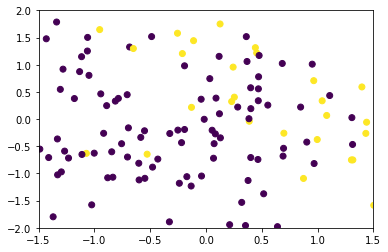

In [18]:
plt.scatter(
    x=pca_train_df["pca_1"],
    y=pca_train_df["pca_2"],
    c=pca_train_df["label"]
)
plt.xlim([-1.5, 1.5])
plt.ylim([-2, 2])
plt.show()

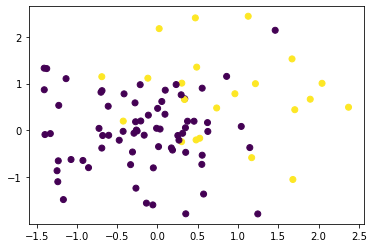

In [19]:
plt.scatter(
    x=pca_test_df["pca_1"],
    y=pca_test_df["pca_2"],
    c=pca_test_df["label"]
)
plt.show()